In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[20,10]

In [2]:
base = pd.read_csv('data1.csv')

In [3]:
base.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,-1.165523,-1.285566,0
1,1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,-0.264071,0.060346,0
2,2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,-0.367189,-1.244781,1
3,3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,-0.751387,0.508983,0
4,4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.193308,-1.244781,1


In [4]:
base.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
base.shape

(7010, 19)

In [6]:
y = base.Churn
X = base.drop('Churn',axis=1)
Xc = sm.add_constant(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.30, random_state=42)

In [8]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (4907, 19)
X_test:  (2103, 19)
y_train:  (4907,)
y_test:  (2103,)


In [9]:
y_train.value_counts()

0    3589
1    1318
Name: Churn, dtype: int64

## Base Model:

In [10]:
base_model = sm.Logit(y_train, X_train).fit()
base_model.summary()

Optimization terminated successfully.
         Current function value: 0.423115
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4907
Model:                          Logit   Df Residuals:                     4888
Method:                           MLE   Df Model:                           18
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.2728
Time:                        21:21:35   Log-Likelihood:                -2076.2
converged:                       True   LL-Null:                       -2855.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3140      0.207     -1.518      0.129      -0.719       0.091
gender              -0.0142      0.077     -0.184      0.854      -0.165       0.137
SeniorCitizen        0.1958      0.101      1.948      0.051      -0.001       0.393
Partner              0.0408      0.092      0.441      0.659      -0.140       0.222
Dependents          -0.2589      0.108     -2.402      0.016      -0.470      -0.048
PhoneService        -0.9005      0.170     -5.283      0.000      -1.235      -0.566
MultipleLines        0.1009      0.048      2.112      0.035       0.007       0.195
InternetService      0.2072      0.076      2.715      0.007       0.058       0.357
OnlineSecurity      -0.2827      0.049     -5.715      0.000      -0.380      -0.186
OnlineBackup        -0.1110      0.045     -2.463      0.014      -0.199      -0.023
DeviceProtection    -0.0611      0.047     -1.308      0.191      -0.153       0.030
TechSupport         -0.1925      0.050     -3.827      0.000      -0.291      -0.094
StreamingTV          0.0135      0.049      0.275      0.783      -0.082       0.109
StreamingMovies      0.0302      0.049      0.616      0.538      -0.066       0.126
Contract            -0.7366      0.091     -8.120      0.000      -0.914      -0.559
PaperlessBilling     0.3519      0.087      4.036      0.000       0.181       0.523
PaymentMethod        0.0401      0.042      0.957      0.339      -0.042       0.122
MonthlyCharges       0.7852      0.068     11.584      0.000       0.652       0.918
TotalCharges        -0.8258      0.068    -12.079      0.000      -0.960      -0.692
====================================================================================
"""

In [11]:
base_model.pvalues[base_model.pvalues<0.05]

Dependents          1.629999e-02
PhoneService        1.272124e-07
MultipleLines       3.470641e-02
InternetService     6.622093e-03
OnlineSecurity      1.096944e-08
OnlineBackup        1.378060e-02
TechSupport         1.296288e-04
Contract            4.679378e-16
PaperlessBilling    5.429910e-05
MonthlyCharges      4.981876e-31
TotalCharges        1.363512e-33
dtype: float64

In [12]:
cols=list(X_train.columns)
while len(cols)>1:
    X_train=X_train[cols]
    model=sm.Logit(y_train, X_train).fit()
    p=model.pvalues
    pmax=max(p)
    pid=p.idxmax()           # index of series with highest value
    if pmax>0.05:
        cols.remove(pid)
        print(pid,pmax)
    else:
        break
cols

Optimization terminated successfully.
         Current function value: 0.423115
         Iterations 7
gender 0.8538963030563274
Optimization terminated successfully.
         Current function value: 0.423118
         Iterations 7
StreamingTV 0.7833514737255725
Optimization terminated successfully.
         Current function value: 0.423126
         Iterations 7
Partner 0.6604085981098456
Optimization terminated successfully.
         Current function value: 0.423146
         Iterations 7
StreamingMovies 0.49119660282272337
Optimization terminated successfully.
         Current function value: 0.423194
         Iterations 7
PaymentMethod 0.3238188571001195
Optimization terminated successfully.
         Current function value: 0.423293
         Iterations 7
const 0.2693853727626684
Optimization terminated successfully.
         Current function value: 0.423418
         Iterations 7
DeviceProtection 0.1384804295570577
Optimization terminated successfully.
         Current function value: 0

['SeniorCitizen',
 'Dependents',
 'PhoneService',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'TechSupport',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges']

In [13]:
# The significant variables are :

X_sig = X[['SeniorCitizen','Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','TechSupport',
          'Contract','PaperlessBilling','MonthlyCharges','TotalCharges']]

In [14]:
Xc_sig = sm.add_constant(X_sig)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(Xc_sig, y, test_size=0.30, random_state=42)

In [16]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (4907, 12)
X_test:  (2103, 12)
y_train:  (4907,)
y_test:  (2103,)


In [17]:
base_model_sig = sm.Logit(y_train, X_train).fit()
base_model_sig.summary()

Optimization terminated successfully.
         Current function value: 0.423895
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4907
Model:                          Logit   Df Residuals:                     4895
Method:                           MLE   Df Model:                           11
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.2715
Time:                        21:21:35   Log-Likelihood:                -2080.1
converged:                       True   LL-Null:                       -2855.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0890      0.158     -0.563      0.573      -0.399       0.221
SeniorCitizen        0.2103      0.099      2.118      0.034       0.016       0.405
Dependents          -0.2411      0.098     -2.470      0.014      -0.432      -0.050
PhoneService        -0.9791      0.160     -6.101      0.000      -1.294      -0.665
InternetService      0.2239      0.072      3.092      0.002       0.082       0.366
OnlineSecurity      -0.2865      0.049     -5.812      0.000      -0.383      -0.190
OnlineBackup        -0.1150      0.045     -2.562      0.010      -0.203      -0.027
TechSupport         -0.1984      0.050     -3.995      0.000      -0.296      -0.101
Contract            -0.7554      0.089     -8.445      0.000      -0.931      -0.580
PaperlessBilling     0.3576      0.087      4.109      0.000       0.187       0.528
MonthlyCharges       0.8312      0.058     14.414      0.000       0.718       0.944
TotalCharges        -0.8063      0.063    -12.783      0.000      -0.930      -0.683
====================================================================================
"""

In [18]:
y_pred_prob = base_model_sig.predict(X_test)

In [19]:
y_pred = [0 if x<0.5 else 1 for x in y_pred_prob]

In [20]:
y_pred[0:5]

[0, 0, 1, 0, 0]

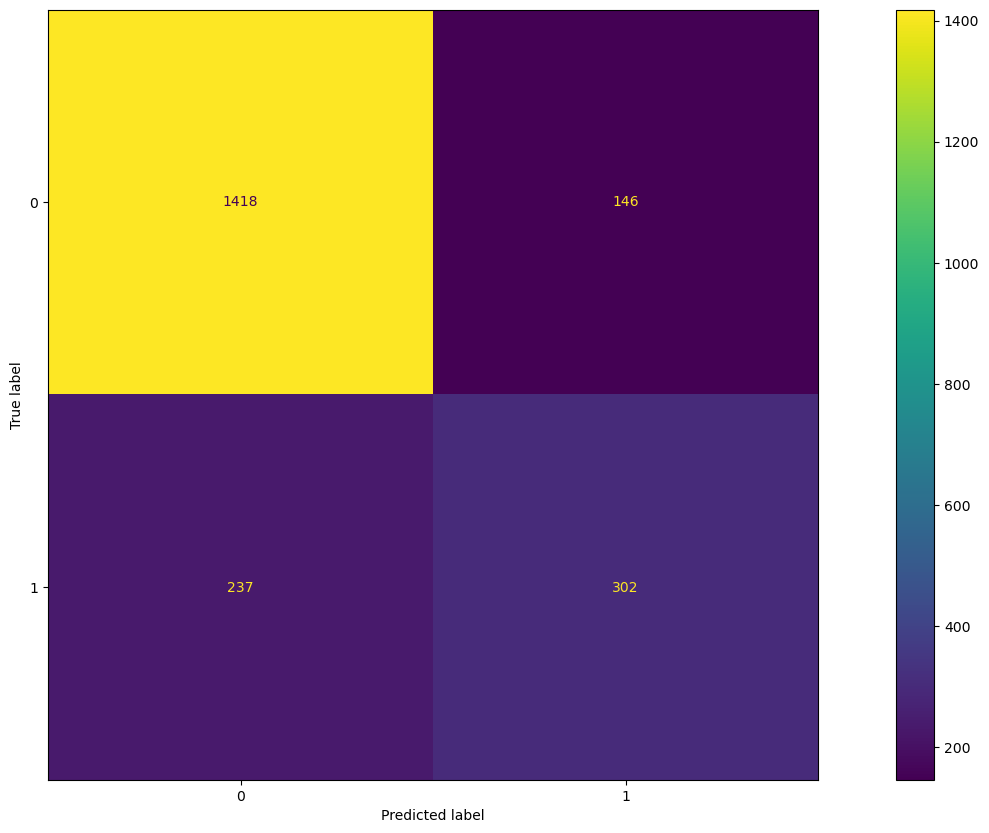

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1564
           1       0.67      0.56      0.61       539

    accuracy                           0.82      2103
   macro avg       0.77      0.73      0.75      2103
weighted avg       0.81      0.82      0.81      2103



## Scores for different cutoff:

In [23]:
from sklearn import metrics

In [24]:
score_card = pd.DataFrame(columns=['Probability Cutoff','AUC score','Precision Score','Recall Score','Accuracy Score',
                                  'Kappa Score','f1-Score'])

def up_scorecard(model,cutoff):
    
    y_pred_prob = model.predict(X_test)
    y_pred = [0 if x<cutoff else 1 for x in y_pred_prob]
    global score_card
    
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                   'AUC score': metrics.roc_auc_score(y_test,y_pred),
                                   'Precision Score': metrics.precision_score(y_test,y_pred),
                                   'Recall Score': metrics.recall_score(y_test,y_pred),
                                   'Accuracy Score': metrics.accuracy_score(y_test,y_pred),
                                   'Kappa Score': metrics.cohen_kappa_score(y_test,y_pred),
                                   'f1-Score': metrics.f1_score(y_test,y_pred)},
                                   ignore_index = True)

In [25]:
cutoff = [0.1, 0.15, 0.2, 0.27, 0.3, 0.35, 0.4]

for value in cutoff:
    up_scorecard(base_model_sig,value)

In [26]:
score_card

,Probability Cutoff,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-Score
0,0.10,0.717732,0.386567,0.961039,0.599144,0.292853,0.551357
1,0.15,0.738150,0.415141,0.925788,0.646695,0.339470,0.573234
2,0.20,0.756902,0.454721,0.875696,0.699001,0.394212,0.598605
3,0.27,0.760171,0.498837,0.795918,0.742748,0.435378,0.613295
4,0.30,0.764448,0.523990,0.769944,0.761769,0.458390,0.623591
5,0.35,0.762933,0.554455,0.727273,0.780314,0.477134,0.629213
6,0.40,0.755276,0.591803,0.669759,0.796957,0.489426,0.628372


In [27]:
y_pred = [0 if x<0.30 else 1 for x in y_pred_prob]

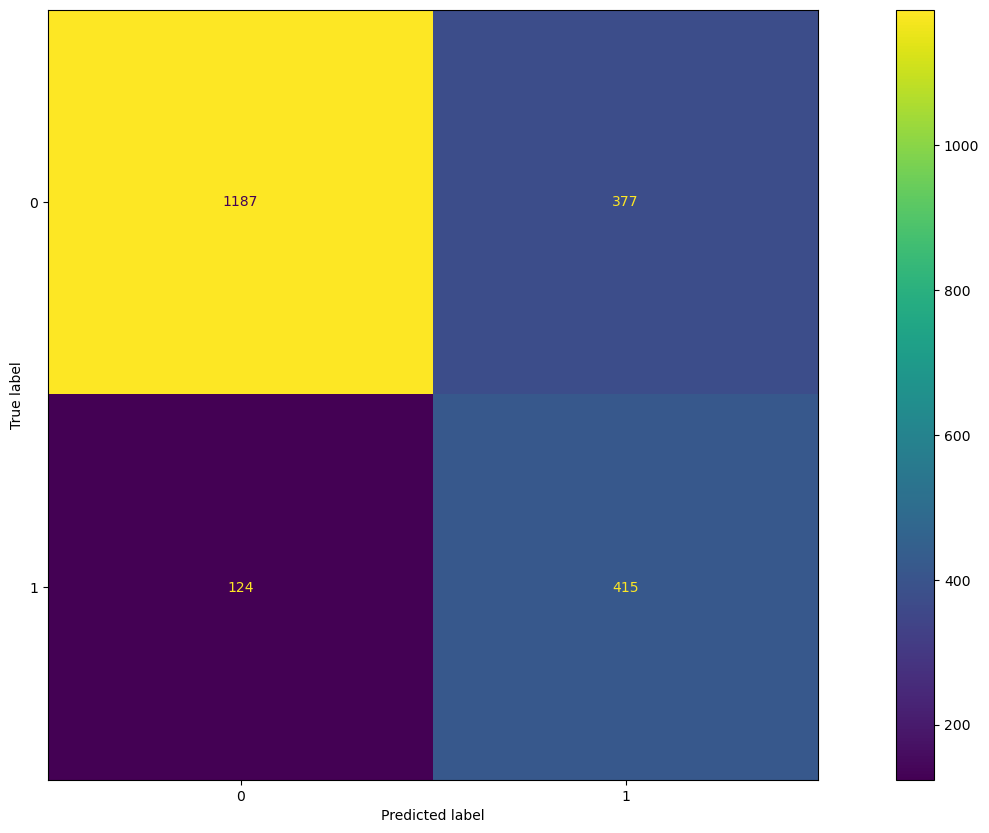

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

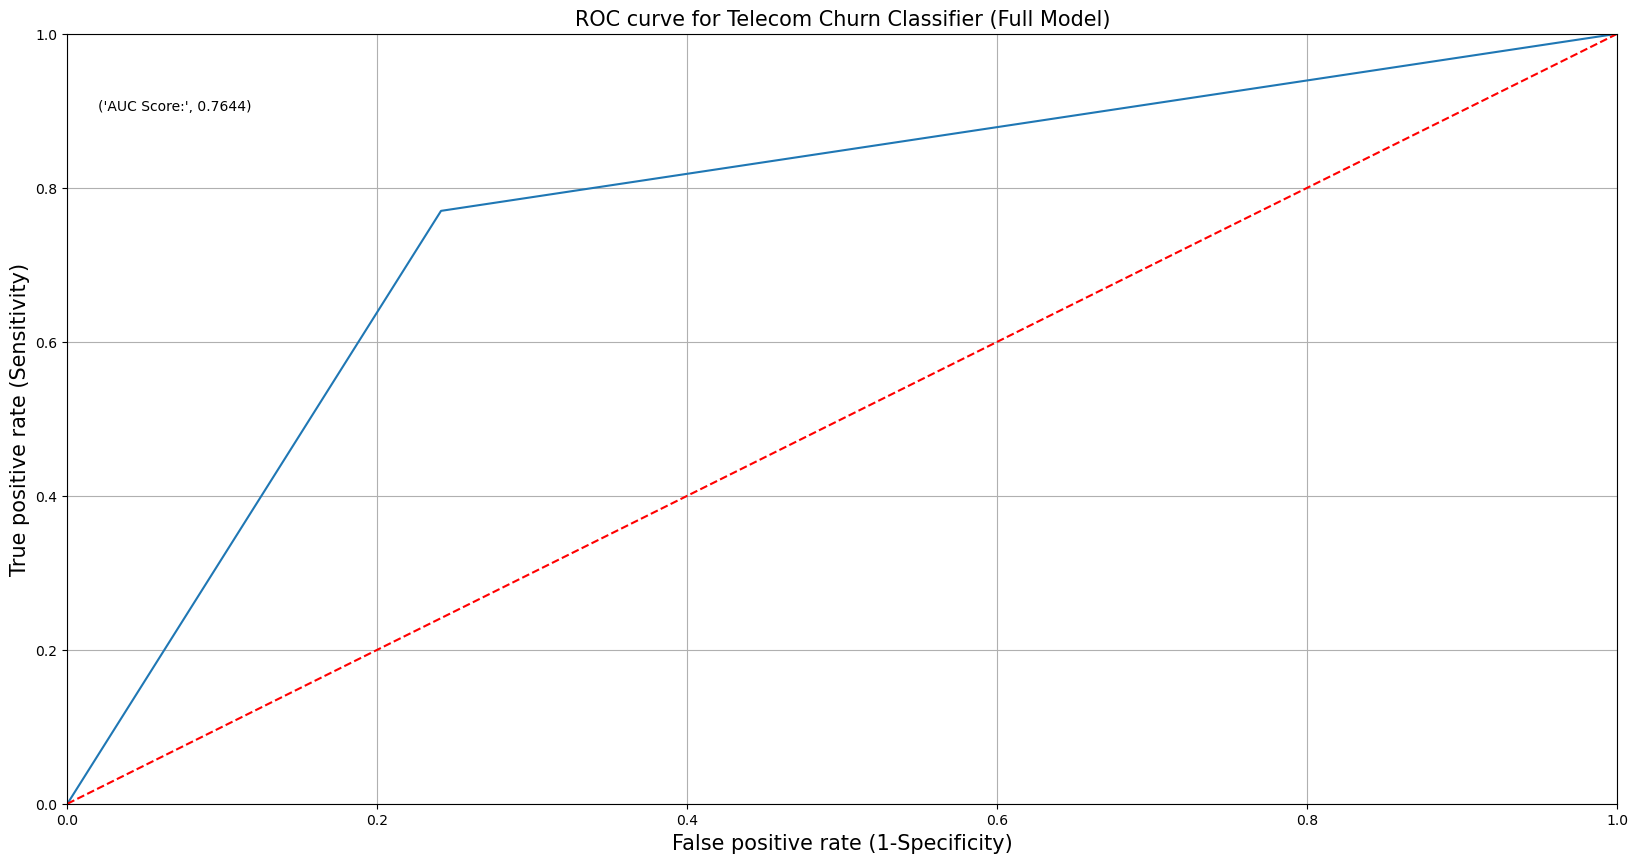

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Telecom Churn Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
plt.grid(True)

## Interpretation :

from above plot, we can say that our base model as LOGISTIC REGRESSIOn has AUC score of 0.7644